In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

In [28]:
class Disk:
    """
    Simple class for representing a disk moving in a 2-dimensional plane.
    """
    
    
    def __init__(self, xpos:float=5, ypos:float=5, xvel:float=0.5, yvel:float=0, radius:float=0.5):
        """
        Initializes a disk object. Attributes are x position, y position, x velocity, and y velocity.
        """
        self.x = xpos
        self.y = ypos
        self.xvel = xvel
        self.yvel = yvel
        self.r = radius
        
    def move(self, dt):
        """
        Updates a disk's position based on its current velocity.
        """
        self.x += self.xvel * dt
        self.y += self.yvel * dt
    

<IPython.core.display.Javascript object>


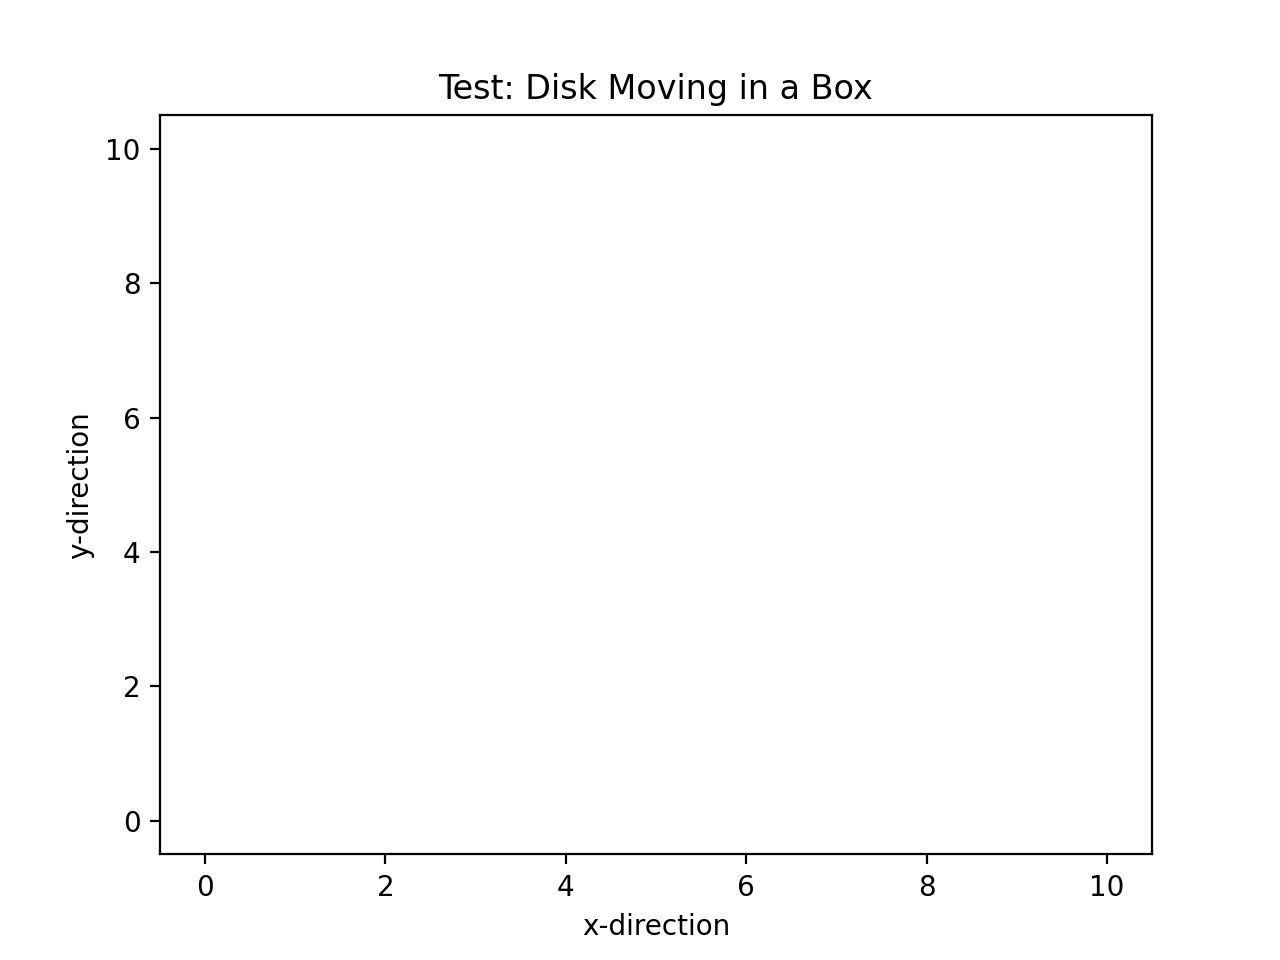

In [80]:
class Animation1:
    """
    Animates the motion of some number of disks.
    """
    
    def __init__(self, disks:list=[]):
        """
        Generates a box and populates it with disks from the input list. 
        """
        self.fig, self.ax = plt.subplots()
        self.ax.set_xlim(-0.5, 10.5)
        self.ax.set_ylim(-0.5, 10.5)
        self.ax.set_xlabel("x-direction")
        self.ax.set_ylabel("y-direction")
        self.ax.set_title("Test: Disk Moving in a Box")
        
        self.t = np.linspace(0, 10, 1001)
        
        self.trace = []
        
        self.disks = disks
        
        for disk in self.disks:
            self.trace += [plt.Circle((disk.x, disk.y), disk.r)]
        
        for trace in self.trace:
            self.ax.add_artist(trace)
            
        
        
    def frame(self, n:int):
        """
        Generates a new frame of the animation.
        """
        
        # self.disks and self.trace should be the same length
        assert(len(self.trace) == len(self.disks))
        
        for i in range(len(self.trace)):
            trace = self.trace[i]
            disk = self.disks[i]
            
            #trace.remove()
            disk.move(1)    # Set dt = 1 as the time step
            trace = [plt.Circle((disk.x, disk.y), disk.r)]
            
        for trace in self.trace:
            self.ax.add_artist(trace)
        
        return self.trace, self.ax
    
    test = Animation()
    anim = FuncAnimation(test.fig, frame, range(1, 10, 2), interval = 100, blit = False)

<IPython.core.display.Javascript object>


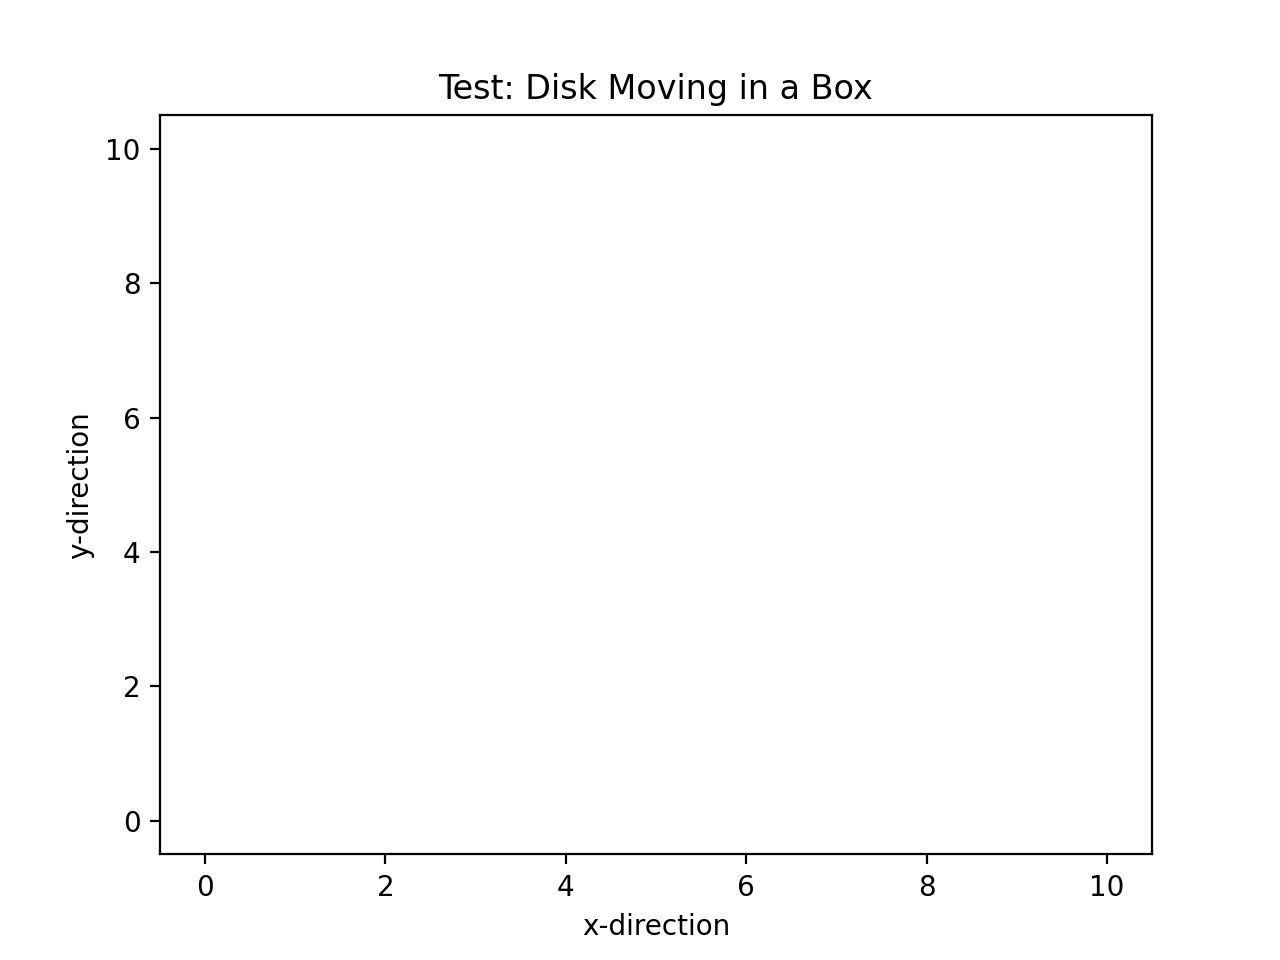

In [104]:
# I WAS WORKING ON THIS CELL ON 4/20
class Animation:
    """
    Animates the motion of some number of disks.
    """
    
    def __init__(self, disks:list=[]):
        """
        Generates a box and populates it with disks from the input list. 
        """
        self.fig, self.ax = plt.subplots()
        self.ax.set_xlim(-0.5, 10.5)
        self.ax.set_ylim(-0.5, 10.5)
        self.ax.set_xlabel("x-direction")
        self.ax.set_ylabel("y-direction")
        self.ax.set_title("Test: Disk Moving in a Box")
        
        self.disks = disks
        
        self.xvals = []
        self.yvals = []
        
        for disk in self.disks:
            self.xvals += [disk.x]
            self.yvals += [disk.x]
            
        self.points, = self.ax.plot(self.xvals, self.yvals, marker="o", markersize=20)
        
        
    def frame(self, n:int):
        """
        Generates a new frame of the animation.
        """
        x = np.ndarray()
        y = np.ndarray()
        
        for disk in self.disk:
            disk.move(0.5)
            
            x += [disk.x]
            y += [disk.y]
        
        
        self.points.set_xdata(x)
        self.points.set_ydata(y)
        
        return self.points

In [105]:
d1 = Disk()

<IPython.core.display.Javascript object>


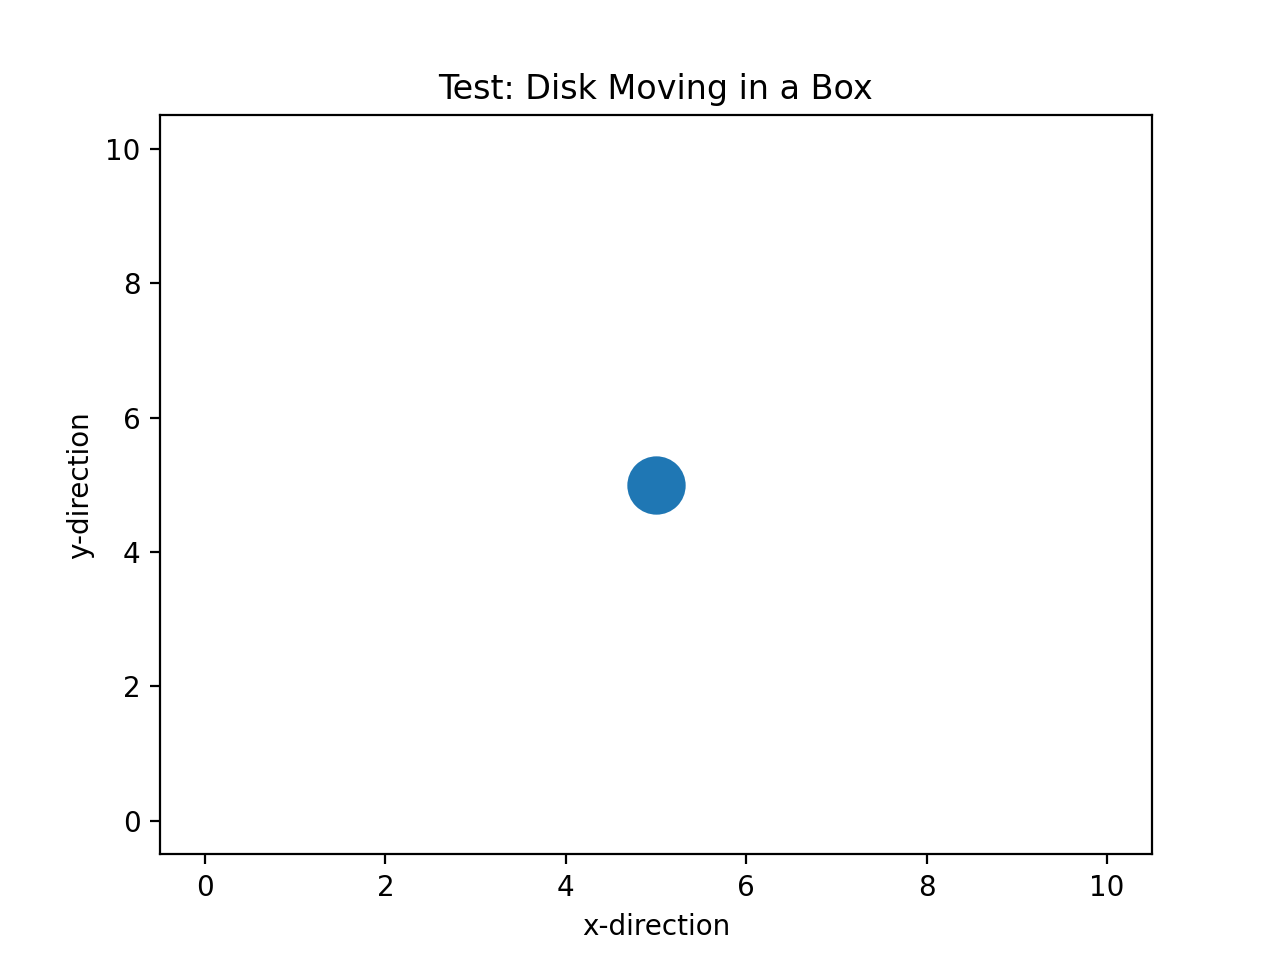

In [109]:
an = Animation([d1])
#an.xvals

<IPython.core.display.Javascript object>


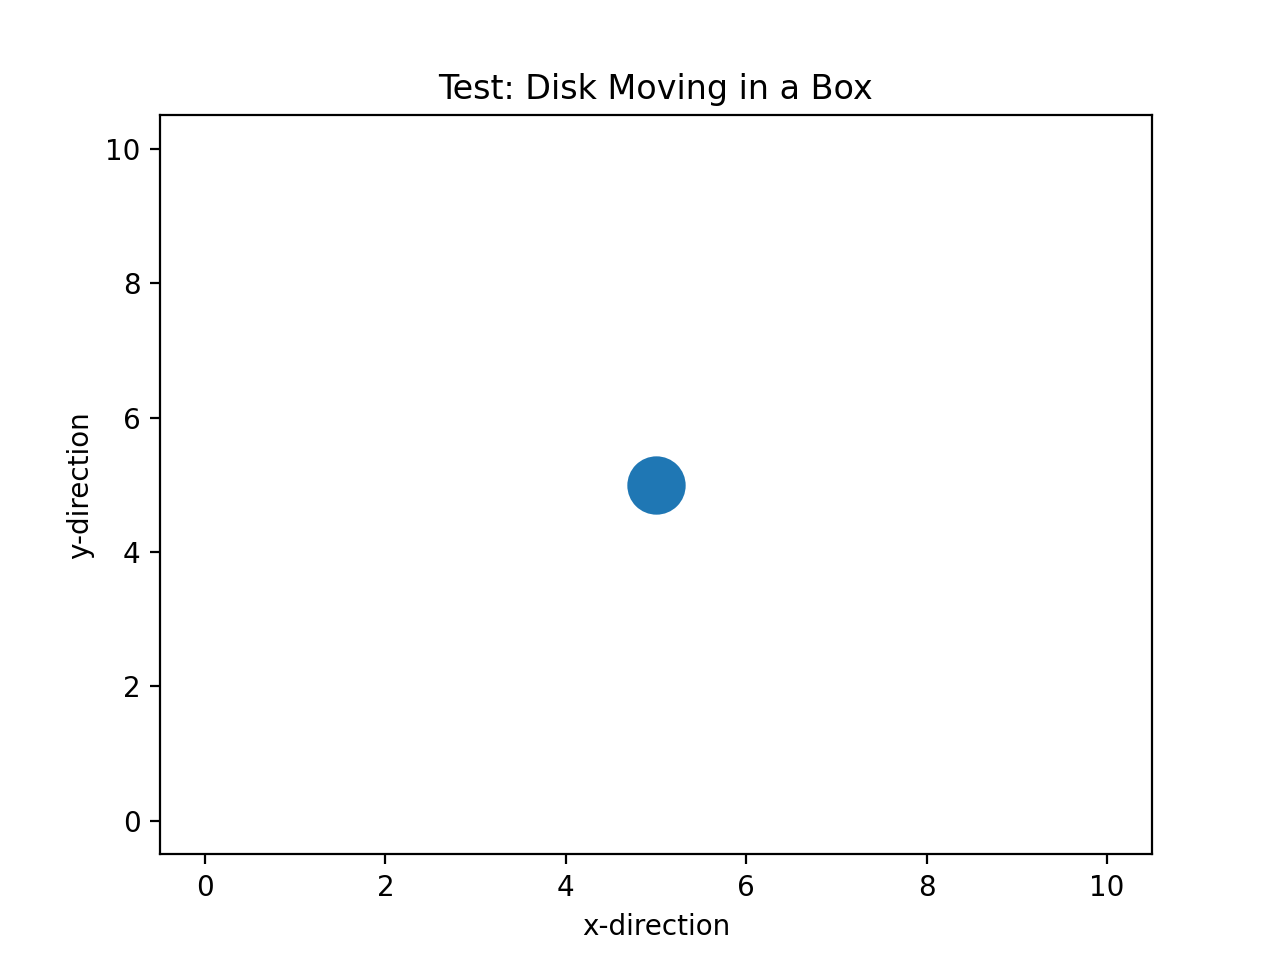

TypeError: frame() missing 2 required positional arguments: 'self' and 'n'

In [111]:
test = Animation([d1])
anim = FuncAnimation(test.fig, Animation.frame(), range(1, 10, 2), interval = 100, blit = True)

In [78]:
help(FuncAnimation)

Help on class FuncAnimation in module matplotlib.animation:

class FuncAnimation(TimedAnimation)
 |  FuncAnimation(fig, func, frames=None, init_func=None, fargs=None, save_count=None, *, cache_frame_data=True, **kwargs)
 |  
 |  Makes an animation by repeatedly calling a function *func*.
 |  
 |  Parameters
 |  ----------
 |  fig : `~matplotlib.figure.Figure`
 |      The figure object used to get needed events, such as draw or resize.
 |  
 |  func : callable
 |      The function to call at each frame.  The first argument will
 |      be the next value in *frames*.   Any additional positional
 |      arguments can be supplied via the *fargs* parameter.
 |  
 |      The required signature is::
 |  
 |          def func(frame, *fargs) -> iterable_of_artists
 |  
 |      If ``blit == True``, *func* must return an iterable of all artists
 |      that were modified or created. This information is used by the blitting
 |      algorithm to determine which parts of the figure have to be update

<IPython.core.display.Javascript object>


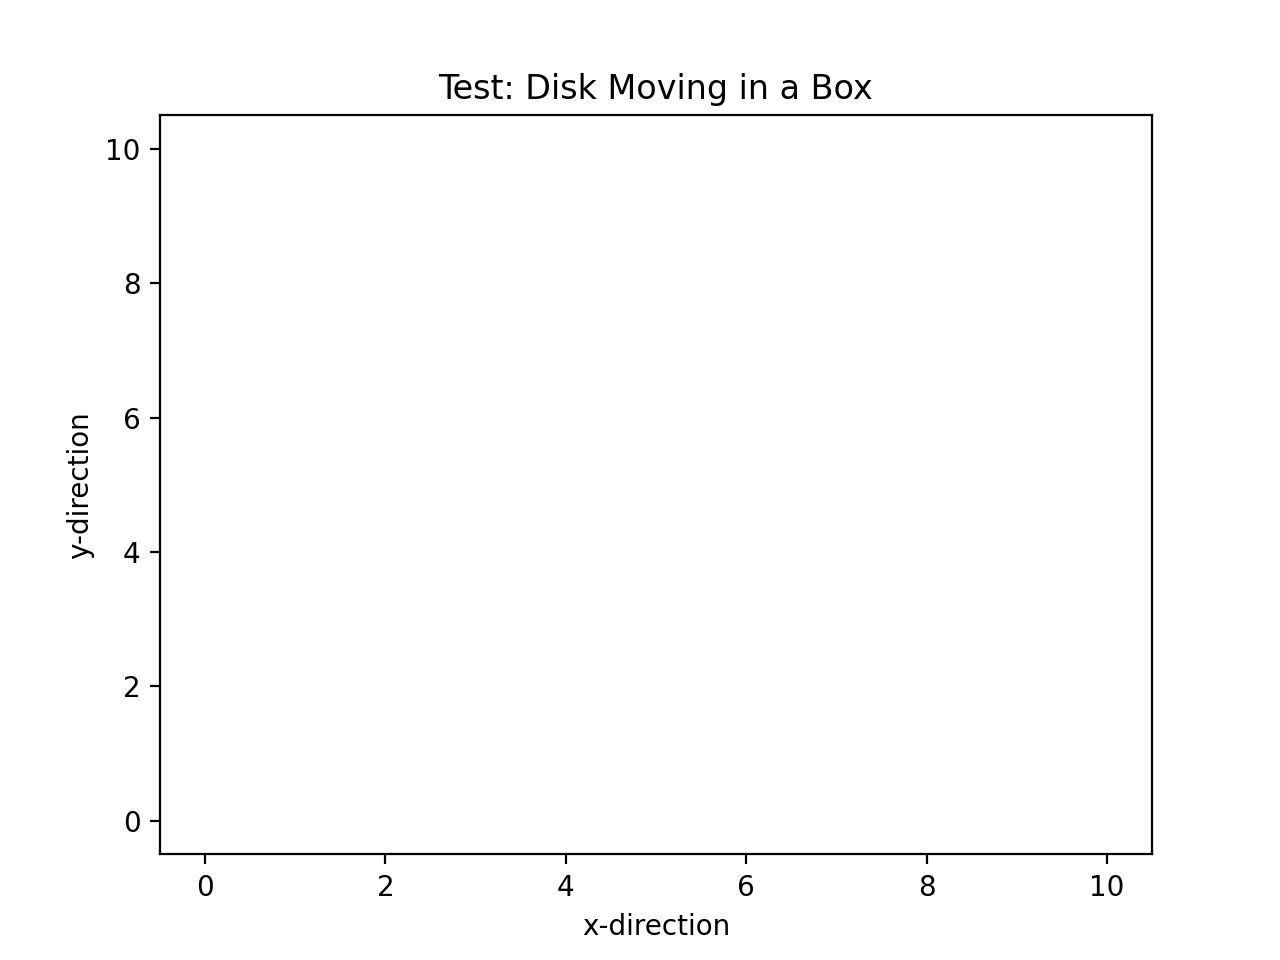

In [33]:
an = Animation()
circle = plt.Circle((5, 5), 0.5)
an.ax.add_artist(circle);

In [34]:
circle.remove()

In [73]:
disk1 = Disk()

<IPython.core.display.Javascript object>


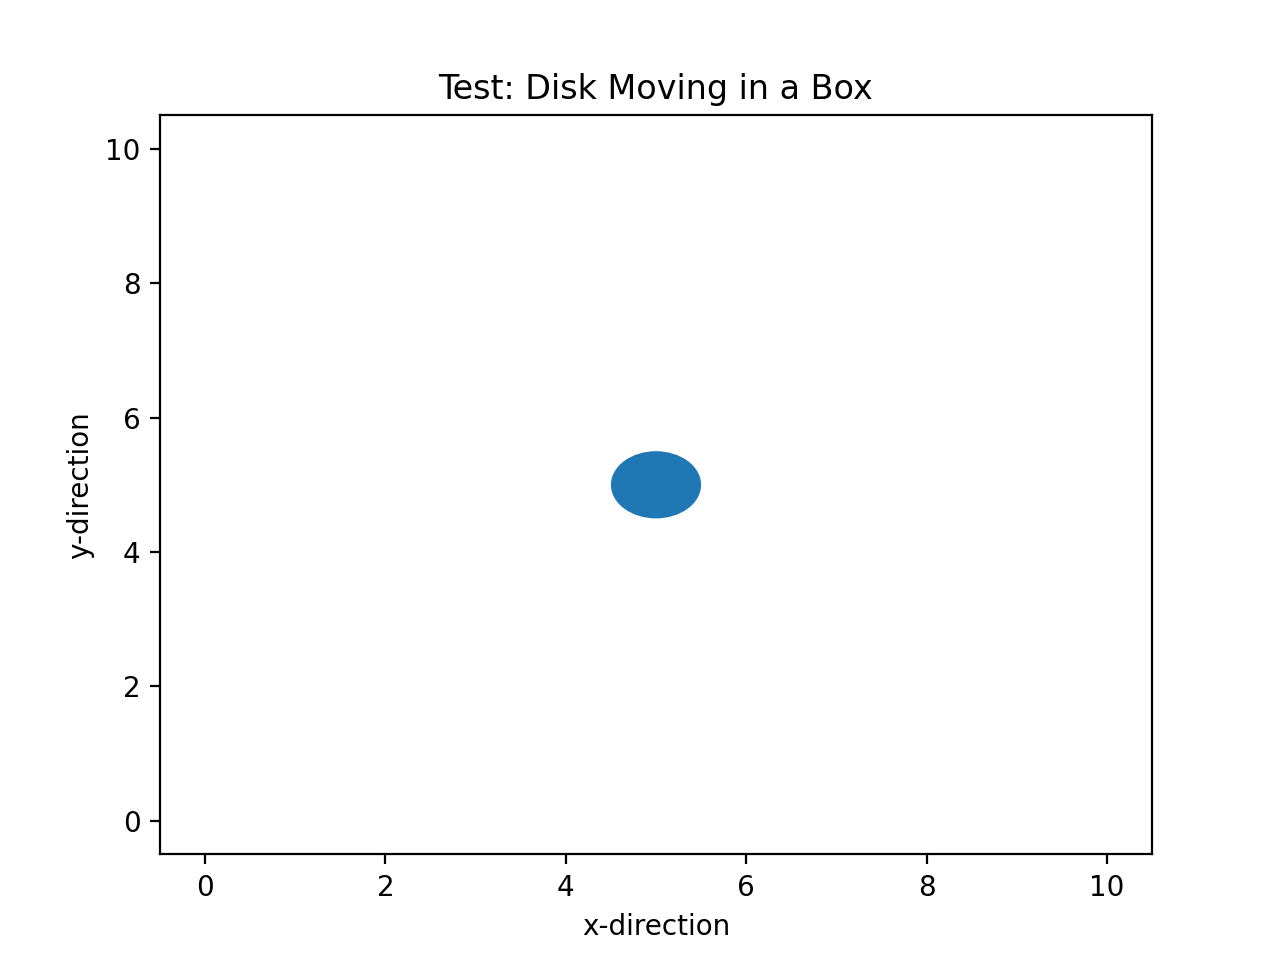

In [74]:
an = Animation([disk1])

<IPython.core.display.Javascript object>


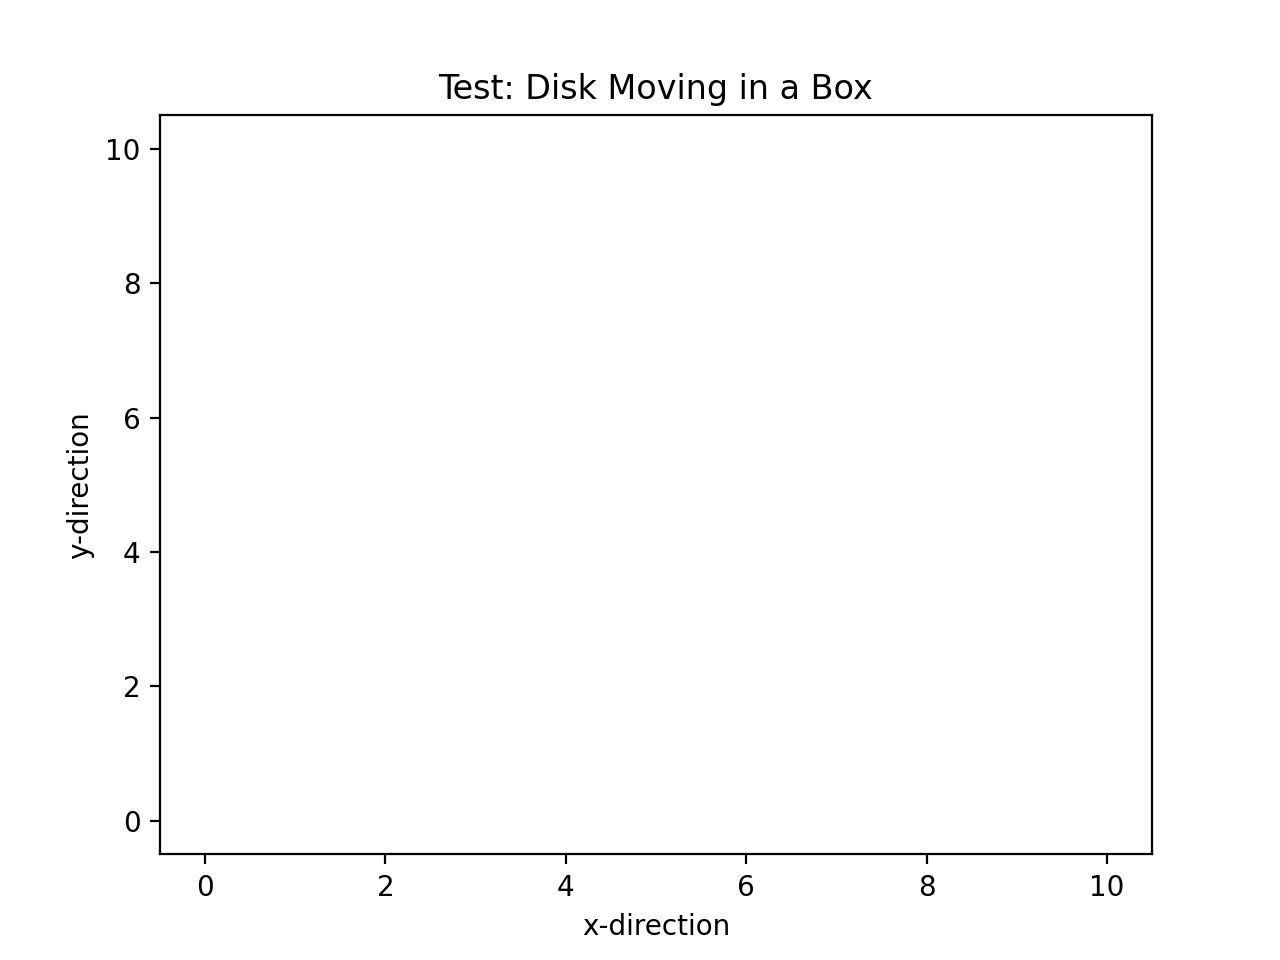

In [76]:
an = Animation([disk1])

for i in range(20):
    an.frame()
    print(an)

<IPython.core.display.Javascript object>


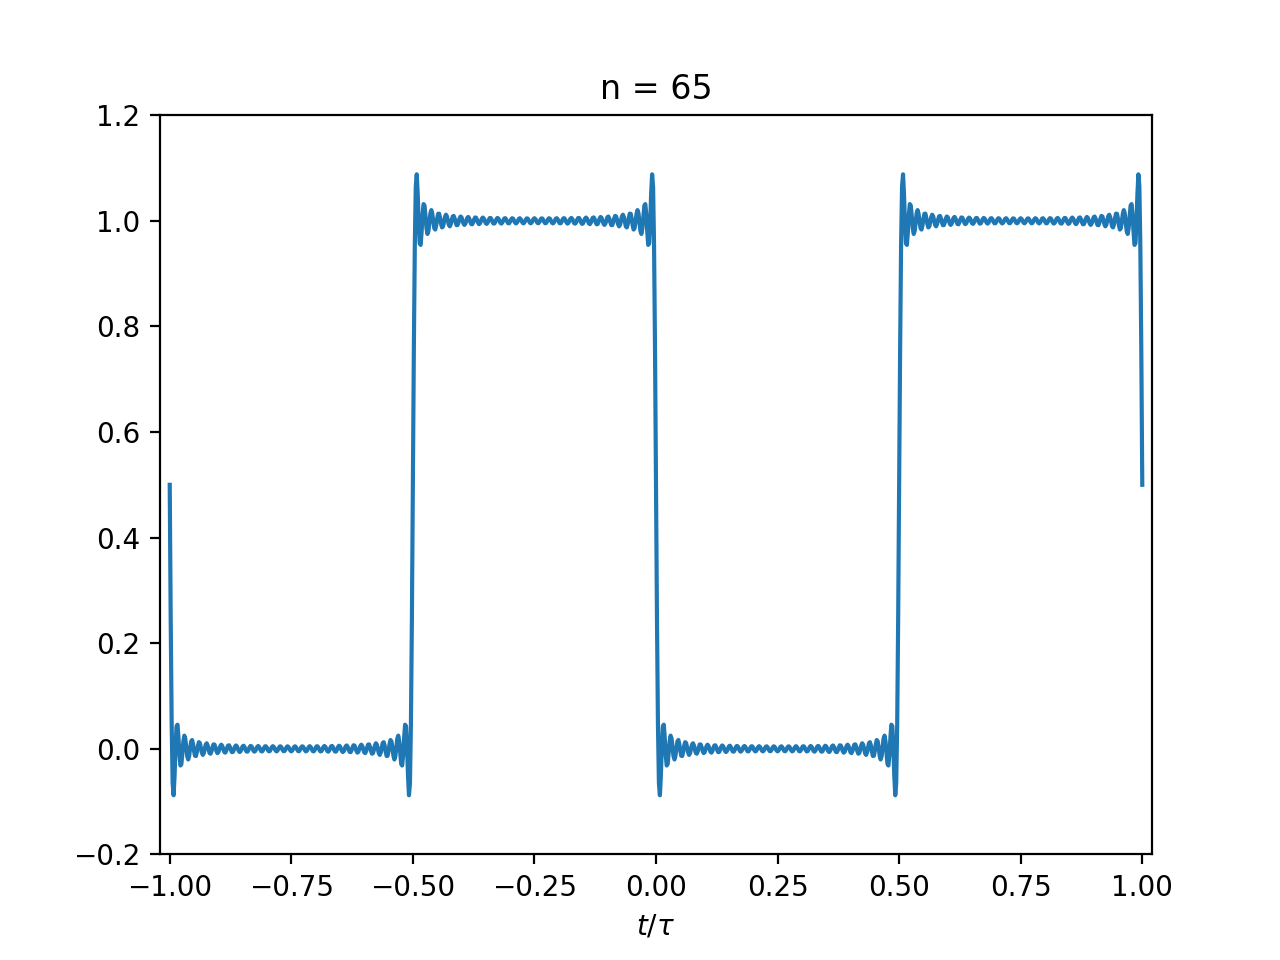

MovieWriter ffmpeg unavailable; using Pillow instead.


In [3]:
fig, ax = plt.subplots()              # create the figure
ax.set_xlim(-1.02, 1.02)              # and adjust axes limits and labels
ax.set_ylim(-0.2,1.2)
ax.set_xlabel(r"$t/\tau$")
ax.set_title("1")
t = np.linspace(-1,1,1001)            # set the time values to use
line, = ax.plot(t,np.zeros_like(t))   # create the trace, saving in a variable
                                      # Note the comma; the ax.plot call returns a list

def frame(n:int):
    y = np.zeros_like(t)              # initialize a vector of y values
    y += 0.5                          # start with the constant
    for i in range(1, n+1, 2):
        y -= 2 / (np.pi * i) * np.sin(2 * np.pi * i * t)
    line.set_ydata(y)                 # update the trace
    title = ax.set_title(f"n = {n}")  # update the plot title
    return line, title                # return the Artists that have changed
    
ani = FuncAnimation(fig, frame, range(1, 80, 2), interval=100, blit=True)
ani.save("squarewave.gif", fps=10, dpi=100)